In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\RICHARD D\Desktop\Machine Learning\placedata v2.0 synthetic.csv")
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
data.shape

(10000, 12)

In [4]:
data.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [5]:
data.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [6]:
#target
data.PlacementStatus.value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

In [7]:
#missing values
data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

# Data Type Conversion

In [8]:
data.dtypes

StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

In [9]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
data.ExtracurricularActivities.value_counts()


ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64

In [11]:
data.ExtracurricularActivities=le.fit_transform(data.ExtracurricularActivities)
data.ExtracurricularActivities.value_counts()

ExtracurricularActivities
1    5854
0    4146
Name: count, dtype: int64

In [12]:
data.PlacementTraining.value_counts()

PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64

In [13]:
data.PlacementTraining=le.fit_transform(data.PlacementTraining)
data.PlacementTraining.value_counts()

PlacementTraining
1    7318
0    2682
Name: count, dtype: int64

In [14]:
data.PlacementStatus.value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

In [15]:
data.PlacementStatus=le.fit_transform(data.PlacementStatus)
data.PlacementStatus.value_counts()

PlacementStatus
0    5803
1    4197
Name: count, dtype: int64

In [16]:
data.dtypes

StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities      int32
PlacementTraining              int32
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus                int32
dtype: object

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [18]:
data=data.drop(["StudentID"],axis=1)

# Model building

In [19]:
data.shape

(10000, 11)

In [20]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [21]:
x.head(1)
#y.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [24]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [26]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [27]:
lg_p=lg.predict(x_te)
lg_p

array([0, 1, 0, ..., 0, 1, 0])

In [28]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[0.90637956, 0.09362044],
       [0.25485733, 0.74514267],
       [0.56847251, 0.43152749],
       ...,
       [0.86393179, 0.13606821],
       [0.30618403, 0.69381597],
       [0.63219667, 0.36780333]])

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[940, 210],
       [252, 598]], dtype=int64)

In [31]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

76.9

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1150
           1       0.74      0.70      0.72       850

    accuracy                           0.77      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.77      0.77      0.77      2000



In [34]:
#AUC-ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.906380,0.093620
1,0.254857,0.745143
2,0.568473,0.431527
3,0.902045,0.097955
4,0.283090,0.716910
...,...,...
1995,0.905292,0.094708
1996,0.600444,0.399556
1997,0.863932,0.136068
1998,0.306184,0.693816


In [36]:
fpr,tpr,thrshold=roc_curve(y_te,df.iloc[:,1])

In [37]:
fpr

array([0.        , 0.        , 0.0033557 , 0.0033557 , 0.00419463,
       0.00419463, 0.00503356, 0.00503356, 0.00587248, 0.00587248,
       0.00671141, 0.00671141, 0.00755034, 0.00755034, 0.00838926,
       0.00838926, 0.01006711, 0.01006711, 0.01090604, 0.01090604,
       0.01174497, 0.01174497, 0.01258389, 0.01258389, 0.01510067,
       0.01510067, 0.0159396 , 0.0159396 , 0.01761745, 0.01761745,
       0.01845638, 0.01845638, 0.0192953 , 0.0192953 , 0.02013423,
       0.02013423, 0.02097315, 0.02097315, 0.02265101, 0.02265101,
       0.02348993, 0.02348993, 0.02432886, 0.02432886, 0.02516779,
       0.02516779, 0.02516779, 0.02600671, 0.02600671, 0.02684564,
       0.02684564, 0.02768456, 0.02768456, 0.02852349, 0.02852349,
       0.02852349, 0.02852349, 0.02936242, 0.02936242, 0.03104027,
       0.03104027, 0.03104027, 0.03187919, 0.03187919, 0.03271812,
       0.03271812, 0.03439597, 0.03439597, 0.0352349 , 0.0352349 ,
       0.03607383, 0.03607383, 0.03691275, 0.03691275, 0.03775

In [38]:
tpr

array([0.        , 0.00123762, 0.00123762, 0.01485149, 0.01485149,
       0.01732673, 0.01732673, 0.02722772, 0.02722772, 0.02846535,
       0.02846535, 0.02970297, 0.02970297, 0.03712871, 0.03712871,
       0.04579208, 0.04579208, 0.0470297 , 0.0470297 , 0.05816832,
       0.05816832, 0.05940594, 0.05940594, 0.06930693, 0.06930693,
       0.08539604, 0.08539604, 0.09158416, 0.09158416, 0.09777228,
       0.09777228, 0.10891089, 0.10891089, 0.11633663, 0.11633663,
       0.12128713, 0.12128713, 0.1720297 , 0.1720297 , 0.18193069,
       0.18193069, 0.20420792, 0.20420792, 0.20668317, 0.20668317,
       0.20915842, 0.21534653, 0.21534653, 0.22277228, 0.22277228,
       0.23267327, 0.23267327, 0.24752475, 0.24752475, 0.25866337,
       0.26113861, 0.26237624, 0.26237624, 0.2710396 , 0.2710396 ,
       0.27846535, 0.28094059, 0.28094059, 0.28589109, 0.28589109,
       0.28836634, 0.28836634, 0.29084158, 0.29084158, 0.29207921,
       0.29207921, 0.29455446, 0.29455446, 0.30321782, 0.30321

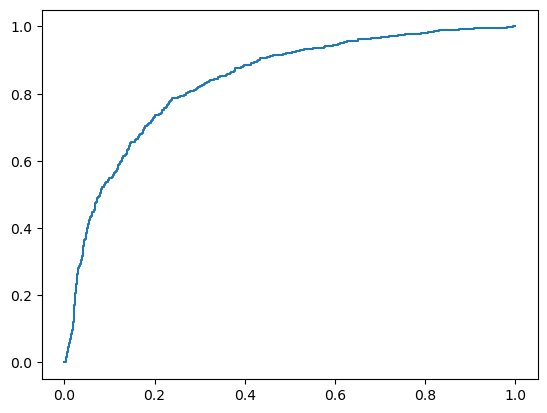

In [39]:
plt.plot(fpr,tpr)

In [40]:
#PRC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [41]:
precision,recall,thershold=precision_recall_curve(y_te,df.iloc[:,1])

In [42]:
precision

array([0.404    , 0.4042021, 0.4044044, ..., 0.5      , 1.       ,
       1.       ])

In [43]:
recall

array([1.        , 1.        , 1.        , ..., 0.00123762, 0.00123762,
       0.        ])

Text(0.5, 1.0, 'Precision-Recall')

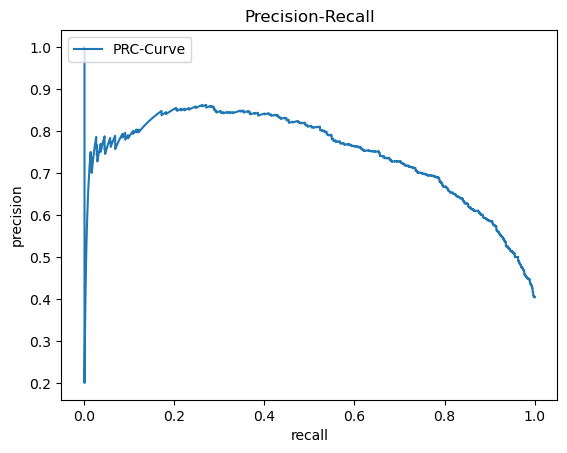

In [44]:
plt.plot(recall,precision,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

In [45]:
#tpr=tp/(tp+fn)
tpr=940/(940+252)
tpr

0.7885906040268457

In [46]:
#fpr=fp/(fp+tn)
fpr=210/(210+598)
fpr

0.2599009900990099

In [47]:
#precision=tp/(tp+fp)
precision=940/(940+210)
precision

0.8173913043478261

In [48]:
#f1score=2(precesion*recall)/(precision+recall)
f1score=(2*(precision*tpr))/(precision+tpr)
f1score

0.8027327070879591

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [50]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [51]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[897, 262],
       [295, 546]], dtype=int64)

In [53]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

72.15

In [54]:
dt.feature_importances_

array([0.10719609, 0.03368219, 0.03513069, 0.03877111, 0.15161223,
       0.08756333, 0.04815197, 0.02170673, 0.11995165, 0.35623403])

In [55]:
dt_df=pd.DataFrame({"Importances":list(dt.feature_importances_),"columns":list(x)})
dt_df

,Importances,columns
0,0.107196,CGPA
1,0.033682,Internships
2,0.035131,Projects
3,0.038771,Workshops/Certifications
4,0.151612,AptitudeTestScore
5,0.087563,SoftSkillsRating
6,0.048152,ExtracurricularActivities
7,0.021707,PlacementTraining
8,0.119952,SSC_Marks
9,0.356234,HSC_Marks


In [56]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1159
           1       0.68      0.65      0.66       841

    accuracy                           0.72      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.72      0.72      0.72      2000



In [57]:
#tpr=tp/(tp+fn)
tpr1=898/(898+294)
tpr1

0.7533557046979866

In [58]:
#fpr=fp/(fp+tn)
fpr1=266/(266+542)
fpr1

0.3292079207920792

In [59]:
#precision=tp/(tp+fp)
precesion1=898/(898+266)
precesion1

0.7714776632302406

In [60]:
#f1score=2(precesion*recall)/(precision+recall)
f1score1=(2*(precesion1*tpr1))/(precesion1+tpr1)
f1score1

0.7623089983022072

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [62]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [63]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 1, ..., 0, 1, 0])

In [64]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[999, 233],
       [193, 575]], dtype=int64)

In [65]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

78.7

In [66]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1232
           1       0.71      0.75      0.73       768

    accuracy                           0.79      2000
   macro avg       0.77      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [67]:
#tpr=tp/(tp+fn)
tpr2=999/(994+193)
tpr2

0.8416175231676495

In [68]:
#fpr=fp/(fp+tn)
fpr2=224/(230+584)
fpr2

0.2751842751842752

In [69]:
#precision=tp/(tp+fp)
precesion2=999/(999+224)
precesion2

0.8168438266557645

In [70]:
#f1score=2(precesion*recall)/(precision+recall)
f1score2=(2*(precesion2*tpr2))/(precesion2+tpr2)
f1score2

0.8290456431535269

In [71]:
precision,recall,threshold=precision_recall_curve(y_te,rf_p)

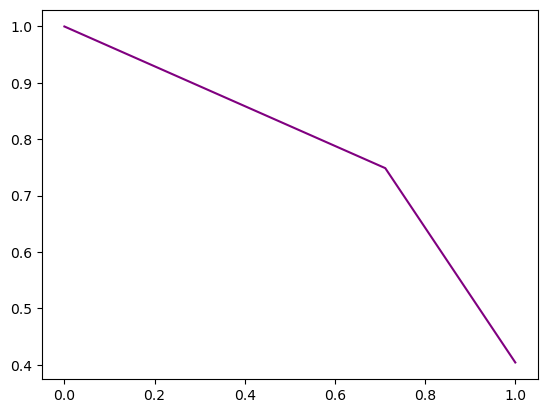

In [72]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="purple")
plt.show()

# knn

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [74]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=15)

In [75]:
knn_p=knn.predict(x_te)

In [76]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[996, 242],
       [196, 566]], dtype=int64)

In [77]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

78.10000000000001

In [78]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1238
           1       0.70      0.74      0.72       762

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [79]:
lst=list()

In [80]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

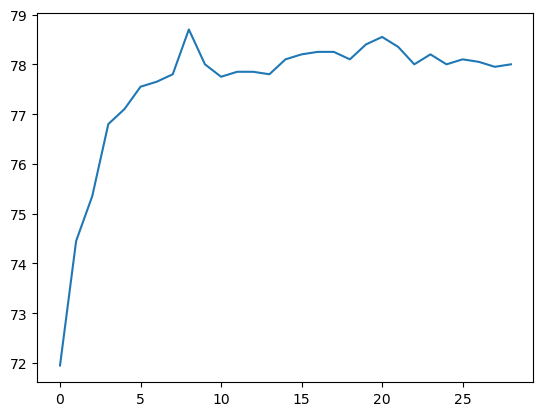

In [81]:
p=plt.plot(lst)

In [82]:
#tpr=tp/(tp+fn)
tpr3=996/(996+196)
tpr3

0.8355704697986577

In [83]:
#fpr=fp/(fp+tn)
fpr3=242/(242+566)
fpr3

0.2995049504950495

In [84]:
#precision=tp/(tp+fp)
precesion3=996/(996+242)
precesion3

0.8045234248788369

In [85]:
#f1score=2(precesion*recall)/(precision+recall)
f1score3=(2*(precesion3*tpr3))/(precesion3+tpr3)
f1score3

0.8197530864197531

# Navie Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [87]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [88]:
nb_p=nb.predict(x_te)

In [89]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m

array([[981, 288],
       [211, 520]], dtype=int64)

In [90]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

75.05

In [91]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1269
           1       0.64      0.71      0.68       731

    accuracy                           0.75      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.76      0.75      0.75      2000



In [92]:
#tpr=tp/(tp+fn)
tpr4=981/(981+211)
tpr4

0.822986577181208

In [93]:
#fpr=fp/(fp+tn)
fpr4=288/(288+520)
fpr4

0.3564356435643564

In [94]:
#precision=tp/(tp+fp)
precesion4=981/(981+288)
precesion4

0.7730496453900709

In [95]:
#f1score=2(precesion*recall)/(precision+recall)
f1score4=(2*(precesion3*tpr3))/(precesion3+tpr3)
f1score4

0.8197530864197531

# SVM

In [96]:
from sklearn.svm import SVC
svc=SVC()

In [97]:
svc.fit(x_tr,y_tr)

SVC()

In [98]:
svc_p=svc.predict(x_te)

In [99]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[985, 239],
       [207, 569]], dtype=int64)

In [100]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

77.7

In [101]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1224
           1       0.70      0.73      0.72       776

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [102]:
#tpr=tp/(tp+fn)
tpr5=985/(985+207)
tpr5

0.8263422818791947

In [103]:
#fpr=fp/(fp+tn)
fpr5=239/(239+569)
fpr5

0.2957920792079208

In [104]:
#precision=tp/(tp+fp)
precesion5=985/(985+239)
precesion5

0.8047385620915033

In [105]:
#f1score=2(precesion*recall)/(precision+recall)
f1score5=(2*(precesion4*tpr4))/(precesion4+tpr4)
f1score5

0.7972368955709062

# Boosting

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [108]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [109]:
adbo_p=adbo.predict(x_te)

In [110]:
adboo_m=confusion_matrix(adbo_p,y_te)
adboo_m

array([[901, 251],
       [291, 557]], dtype=int64)

In [111]:
adbo_acc=adboo_m.diagonal().sum()/adboo_m.sum()*100
adbo_acc

72.89999999999999

In [112]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1152
           1       0.69      0.66      0.67       848

    accuracy                           0.73      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000



In [113]:
#tpr=tp/(tp+fn)
tpr6=904/(904+288)
tpr6

0.7583892617449665

In [114]:
#fpr=fp/(fp+tn)
fpr6=244/(244+564)
fpr6

0.30198019801980197

In [115]:
#precision=tp/(tp+fp)
precesion6=904/(904+244)
precesion6

0.7874564459930313

In [116]:
#f1score=2(precesion*recall)/(precision+recall)
f1score6=(2*(precesion5*tpr5))/(precesion5+tpr5)
f1score6

0.8153973509933775

# XG Boost

In [117]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [118]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [119]:
xgb_p=xgb.predict(x_te)

In [120]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[986, 230],
       [206, 578]], dtype=int64)

In [121]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

78.2

In [122]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1216
           1       0.72      0.74      0.73       784

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [123]:
#tpr=tp/(tp+fn)
tpr7=986/(986+206)
tpr7

0.8271812080536913

In [124]:
#fpr=fp/(fp+tn)
fpr7=230/(230+578)
fpr7

0.28465346534653463

In [125]:
#precision=tp/(tp+fp)
precesion7=986/(986+230)
precesion7

0.8108552631578947

In [126]:
#f1score=2(precesion*recall)/(precision+recall)
f1score7=(2*(precesion7*tpr7))/(precesion7+tpr7)
f1score7

0.8189368770764119

In [127]:
#DF-1`
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,nb_acc,svc_acc,knn_acc,adbo_acc,xgb_acc]
l3=[fpr,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
l4=[tpr,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7]
l5=[f1score,f1score1,f1score3,f1score3,f1score4,f1score5,f1score6,f1score7]

In [128]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,76.90,0.259901,0.788591,0.802733
1,dt,72.15,0.329208,0.753356,0.762309
2,rf,78.70,0.275184,0.841618,0.819753
3,nb,75.05,0.299505,0.835570,0.819753
4,svc,77.70,0.356436,0.822987,0.819753
5,knn,78.10,0.295792,0.826342,0.797237
6,adaboost,72.90,0.301980,0.758389,0.815397
7,xgboost,78.20,0.284653,0.827181,0.818937


In [129]:
data.dtypes

CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities      int32
PlacementTraining              int32
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus                int32
dtype: object

# Class Imbalance

In [130]:
#oversampling
c_0,c_1=data["PlacementStatus"].value_counts()
c_0,c_1

(5803, 4197)

In [131]:
train_0=data[data["PlacementStatus"]==0]
train_1=data[data["PlacementStatus"]==1]

In [132]:
train_0.shape,train_1.shape

((5803, 11), (4197, 11))

In [133]:
train_1over=train_1.sample(c_0,replace=True)

In [134]:
train_1over.shape

(5803, 11)

In [135]:
class_1=pd.concat([train_1over,train_0],axis=0)

In [136]:
class_1.shape

(11606, 11)

In [137]:
class_1.head(1)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9062,8.6,1,2,2,88,4.3,1,1,71,82,1


In [138]:
class_1.PlacementStatus.value_counts()

PlacementStatus
1    5803
0    5803
Name: count, dtype: int64

# Outliers

<Axes: >

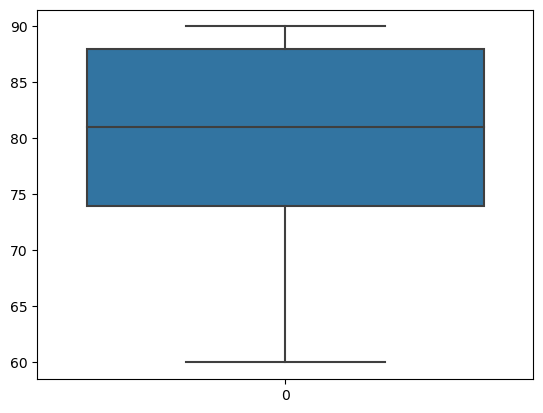

In [139]:
sns.boxplot(class_1["AptitudeTestScore"])

<Axes: >

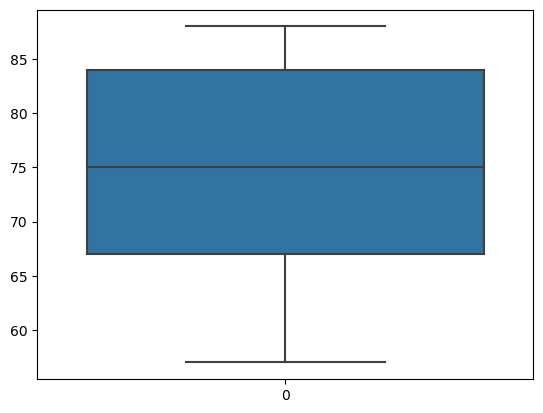

In [140]:
sns.boxplot(class_1["HSC_Marks"])

<Axes: >

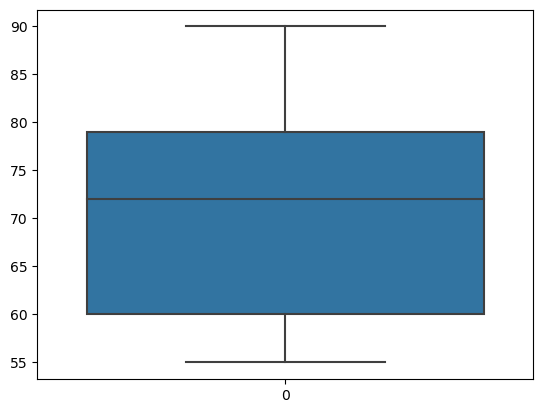

In [141]:
sns.boxplot(class_1["SSC_Marks"])

In [142]:
class_1.skew()

CGPA                        -0.461745
Internships                 -0.087504
Projects                    -0.189509
Workshops/Certifications     0.101668
AptitudeTestScore           -0.436570
SoftSkillsRating            -0.740873
ExtracurricularActivities   -0.505569
PlacementTraining           -1.179188
SSC_Marks                   -0.072222
HSC_Marks                   -0.120107
PlacementStatus              0.000000
dtype: float64

# Visualization

(array([ 229.,  324.,  601.,  912., 1033., 1218., 1336., 1327., 1250.,
        3376.]),
 array([60., 63., 66., 69., 72., 75., 78., 81., 84., 87., 90.]),
 <BarContainer object of 10 artists>)

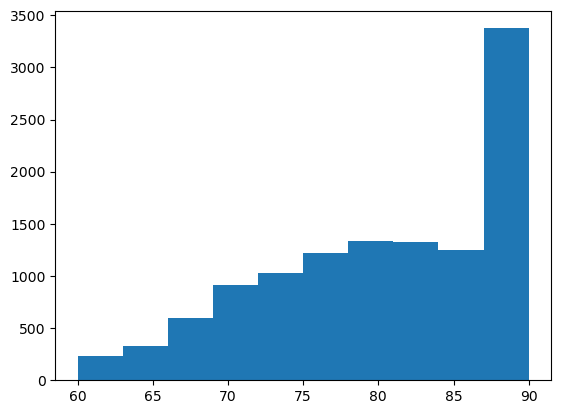

In [143]:
plt.hist(class_1["AptitudeTestScore"])

(array([2594.,  836.,  901.,  585., 1205., 1169., 1778., 1184.,  933.,
         421.]),
 array([55. , 58.5, 62. , 65.5, 69. , 72.5, 76. , 79.5, 83. , 86.5, 90. ]),
 <BarContainer object of 10 artists>)

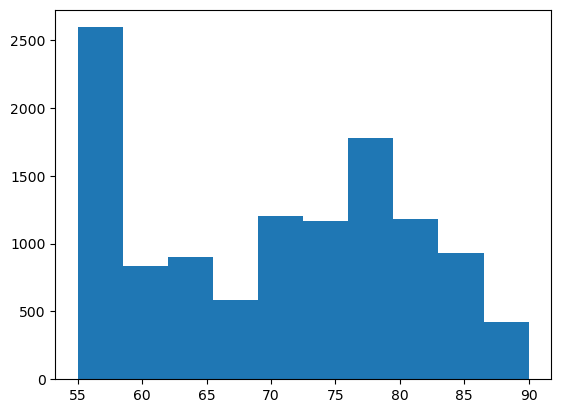

In [144]:
plt.hist(class_1["SSC_Marks"])

(array([ 343.,  832., 1343., 1592., 1201.,  608.,  343., 1028., 2004.,
        2312.]),
 array([57. , 60.1, 63.2, 66.3, 69.4, 72.5, 75.6, 78.7, 81.8, 84.9, 88. ]),
 <BarContainer object of 10 artists>)

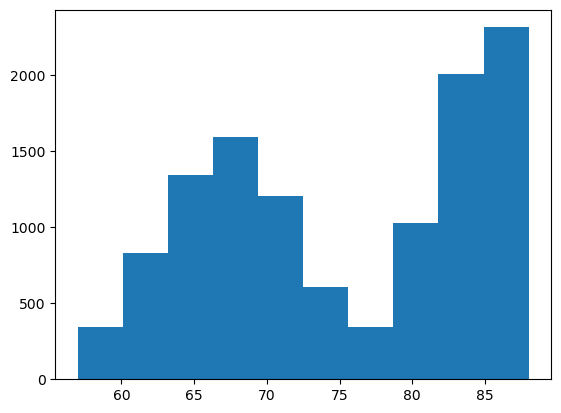

In [145]:
plt.hist(class_1["HSC_Marks"])

<Axes: xlabel='Internships'>

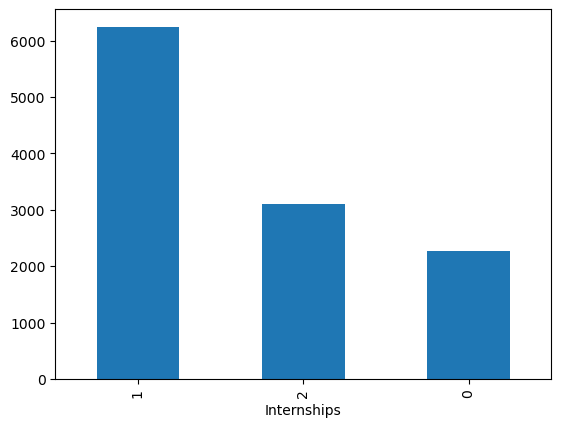

In [146]:
class_1["Internships"].value_counts().plot.bar()

<Axes: xlabel='Projects'>

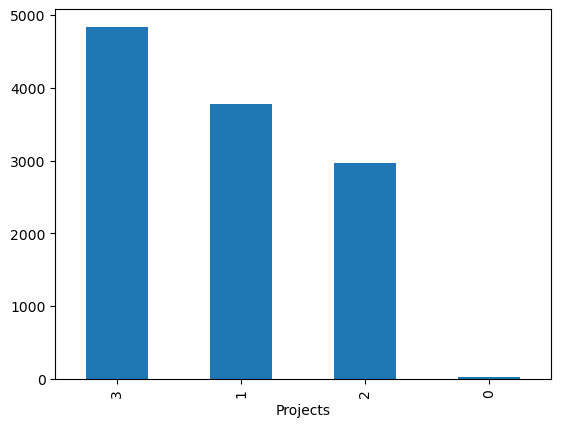

In [147]:
class_1["Projects"].value_counts().plot.bar()

<Axes: xlabel='Workshops/Certifications'>

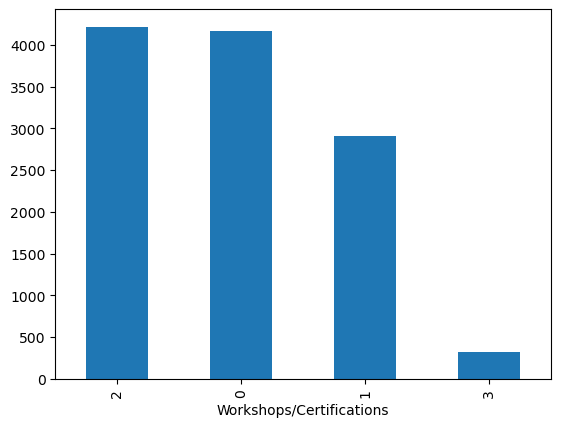

In [148]:
class_1["Workshops/Certifications"].value_counts().plot.bar()

<Axes: xlabel='Internships', ylabel='count'>

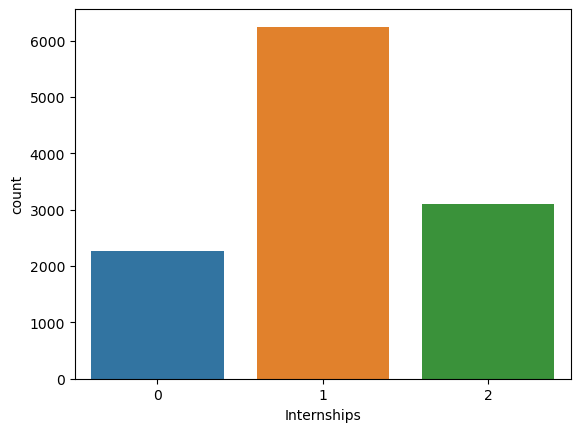

In [149]:
sns.countplot(x="Internships", data=class_1)

<Axes: xlabel='Projects', ylabel='count'>

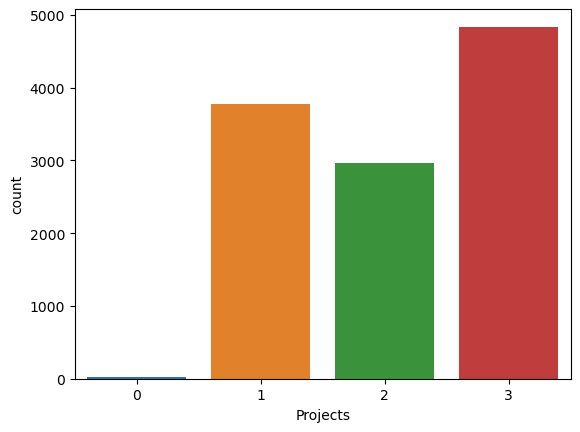

In [150]:
sns.countplot(x="Projects", data=class_1)

<Axes: xlabel='Workshops/Certifications', ylabel='count'>

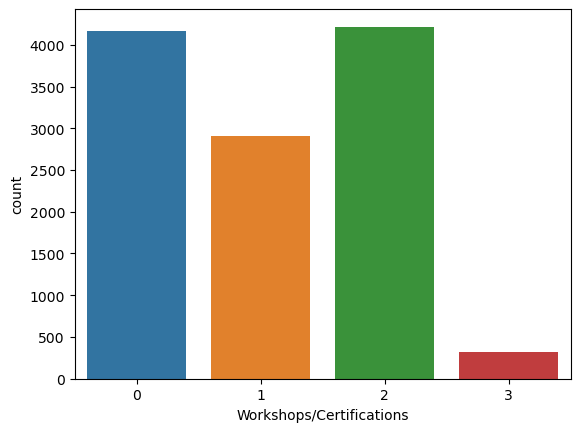

In [151]:
sns.countplot(x="Workshops/Certifications", data=class_1)

In [152]:
cor=class_1.corr()
cor

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
CGPA,1.000000,0.291053,0.441543,0.356233,0.469301,0.398949,0.443318,0.256935,0.414718,0.464659,0.424412
Internships,0.291053,1.000000,0.311204,0.282008,0.326931,0.284485,0.270071,0.154768,0.275093,0.309361,0.251999
Projects,0.441543,0.311204,1.000000,0.378513,0.543547,0.454956,0.493443,0.290191,0.499494,0.531295,0.475780
Workshops/Certifications,0.356233,0.282008,0.378513,1.000000,0.396128,0.351246,0.379109,0.182159,0.384518,0.417355,0.356887
AptitudeTestScore,0.469301,0.326931,0.543547,0.396128,1.000000,0.526258,0.476646,0.317011,0.517620,0.564479,0.521305
SoftSkillsRating,0.398949,0.284485,0.454956,0.351246,0.526258,1.000000,0.449312,0.237296,0.427957,0.467428,0.427037
ExtracurricularActivities,0.443318,0.270071,0.493443,0.379109,0.476646,0.449312,1.000000,0.328860,0.527397,0.531720,0.493595
PlacementTraining,0.256935,0.154768,0.290191,0.182159,0.317011,0.237296,0.328860,1.000000,0.257426,0.327987,0.334467
SSC_Marks,0.414718,0.275093,0.499494,0.384518,0.517620,0.427957,0.527397,0.257426,1.000000,0.524324,0.478414
HSC_Marks,0.464659,0.309361,0.531295,0.417355,0.564479,0.467428,0.531720,0.327987,0.524324,1.000000,0.505623


<Axes: >

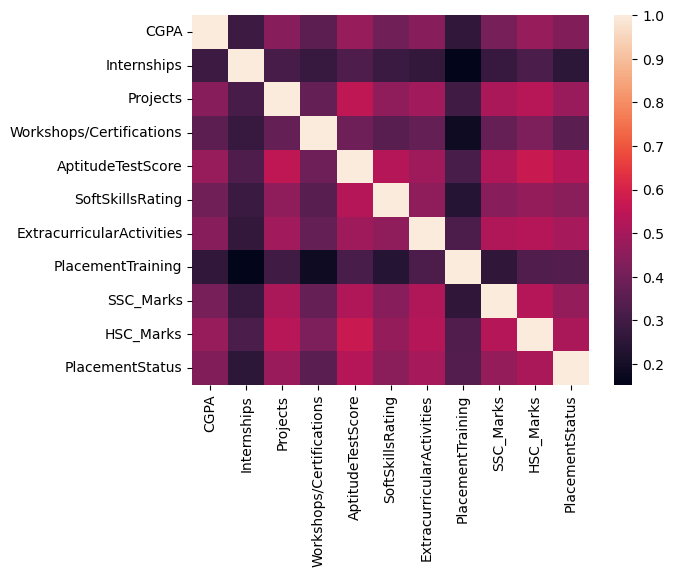

In [153]:
sns.heatmap(cor)

<Axes: xlabel='PlacementStatus'>

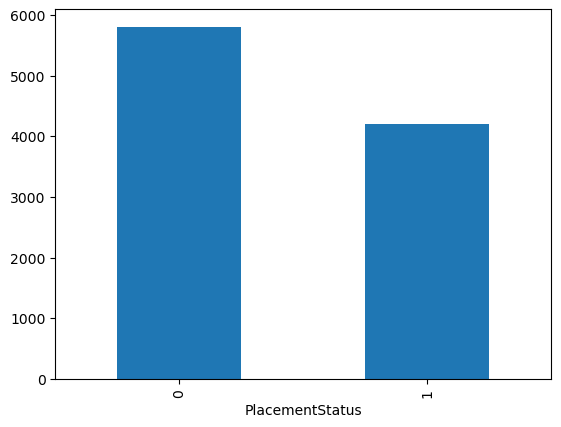

In [154]:
data["PlacementStatus"].value_counts().plot.bar()

<Axes: xlabel='PlacementStatus'>

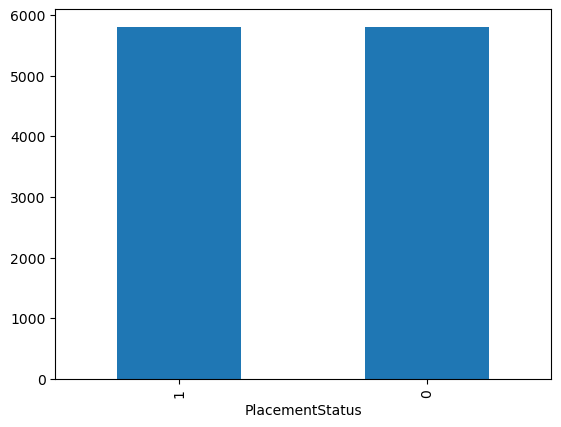

In [153]:
class_1["PlacementStatus"].value_counts().plot.bar()

# Model build

In [154]:
xo=class_1.iloc[:,:-1]
yo=class_1.iloc[:,-1]

In [155]:
yo.shape,xo.shape

((11606,), (11606, 10))

In [156]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(xo,yo,test_size=0.2,random_state=100)

In [157]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((9284, 10), (2322, 10), (9284,), (2322,))

# Logestic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [159]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [160]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 0, 1, ..., 1, 0, 0])

In [161]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 0, 1, ..., 1, 0, 0])

In [162]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[884, 202],
       [310, 926]], dtype=int64)

In [163]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

77.95004306632214

In [164]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      1086
           1       0.82      0.75      0.78      1236

    accuracy                           0.78      2322
   macro avg       0.78      0.78      0.78      2322
weighted avg       0.78      0.78      0.78      2322



In [165]:
#tpr=tp/(tp+fn)
tpr8=876/(876+318)
tpr8

0.7336683417085427

In [166]:
#fpr=fp/(fp+tn)
fpr8=186/(186+942)
fpr8

0.16489361702127658

In [167]:
#precision=tp/(tp+fp)
precesion8=876/(876+186)
precesion8

0.8248587570621468

In [168]:
#f1score=2(precesion*recall)/(precision+recall)
f1score8=(2*(precesion8*tpr8))/(precesion8+tpr8)
f1score8

0.776595744680851

# Decision Tree

In [169]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [170]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [171]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 0, 1, ..., 1, 1, 1])

In [172]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[898, 138],
       [296, 990]], dtype=int64)

In [173]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

81.30921619293713

In [174]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1036
           1       0.88      0.77      0.82      1286

    accuracy                           0.81      2322
   macro avg       0.81      0.82      0.81      2322
weighted avg       0.82      0.81      0.81      2322



In [175]:
#tpr=tp/(tp+fn)
tpr9=913/(913+281)
tpr9

0.7646566164154104

In [176]:
#fpr=fp/(fp+tn)
fpr9=110/(110+1018)
fpr9

0.0975177304964539

In [177]:
#precision=tp/(tp+fp)
precesion9=913/(913+110)
precesion9

0.8924731182795699

In [178]:
#f1score=2(precesion*recall)/(precision+recall)
f1score9=(2*(precesion9*tpr9))/(precesion9+tpr9)
f1score9

0.8236355435272892

# Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [180]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [181]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([1, 0, 1, ..., 1, 1, 0])

In [182]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[ 995,  101],
       [ 199, 1027]], dtype=int64)

In [183]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

87.08010335917312

In [184]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1096
           1       0.91      0.84      0.87      1226

    accuracy                           0.87      2322
   macro avg       0.87      0.87      0.87      2322
weighted avg       0.87      0.87      0.87      2322



In [185]:
#tpr=tp/(tp+fn)
tpr10=987/(987+207)
tpr10

0.8266331658291457

In [186]:
#fpr=fp/(fp+tn)
fpr10=93/(93+1035)
fpr10

0.08244680851063829

In [187]:
#precision=tp/(tp+fp)
precesion10=987/(987+93)
precesion10

0.9138888888888889

In [188]:
#f1score=2(precesion*recall)/(precision+recall)
f1score10=(2*(precesion10*tpr10))/(precesion6+tpr10)
f1score10

0.9360705377261668

In [189]:
precision,recall,threshold=precision_recall_curve(y1_te,rf_pre1)

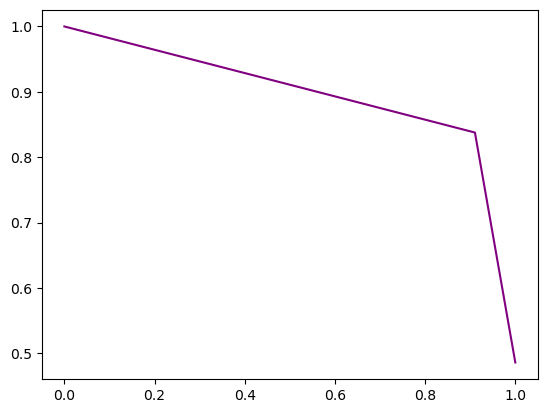

In [190]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="purple")
plt.show()

# KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [192]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [193]:
knn_p1=knn.predict(x_te)

In [194]:
knn_m1=confusion_matrix(knn_p1,y_te)
knn_m1

array([[1002,  250],
       [ 190,  558]], dtype=int64)

In [195]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

78.0

In [196]:
print(classification_report(knn_p1,y_te))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1252
           1       0.69      0.75      0.72       748

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [197]:
#tpr=tp/(tp+fn)
tpr11=1002/(1002+190)
tpr11

0.8406040268456376

In [198]:
#fpr=fp/(fp+tn)
fpr11=250/(250+558)
fpr11

0.3094059405940594

In [199]:
#precision=tp/(tp+fp)
precesion11=1002/(1002+250)
precesion11

0.8003194888178914

In [200]:
#f1score=2(precesion*recall)/(precision+recall)
f1score11=(2*(precesion11*tpr11))/(precesion11+tpr11)
f1score11

0.8199672667757774

# NB-Naive Bayes

In [201]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [202]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [203]:
nb_p1=nb.predict(x_te)

In [204]:
nb_m1=confusion_matrix(nb_p1,y_te)
nb_m1

array([[981, 288],
       [211, 520]], dtype=int64)

In [205]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

75.05

In [206]:
print(classification_report(nb_p1,y_te))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1269
           1       0.64      0.71      0.68       731

    accuracy                           0.75      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.76      0.75      0.75      2000



In [207]:
#tpr=tp/(tp+fn)
tpr12=981/(981+211)
tpr12

0.822986577181208

In [208]:
#fpr=fp/(fp+tn)
fpr12=288/(288+520)
fpr12

0.3564356435643564

In [209]:
#precision=tp/(tp+fp)
precesion12=981/(981+288)
precesion12

0.7730496453900709

In [210]:
#f1score=2(precesion*recall)/(precision+recall)
f1score12=(2*(precesion12*tpr12))/(precesion12+tpr12)
f1score12

0.7972368955709062

# SVM

In [211]:
from sklearn.svm import SVC
svc=SVC()

In [212]:
svc.fit(x_tr,y_tr)

SVC()

In [213]:
svc_p1=svc.predict(x_te)
svc_p1

array([0, 1, 1, ..., 0, 1, 0])

In [214]:
svc_m1=confusion_matrix(svc_p1,y_te)
svc_m1

array([[985, 239],
       [207, 569]], dtype=int64)

In [215]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

77.7

In [216]:
print(classification_report(svc_p1,y_te))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1224
           1       0.70      0.73      0.72       776

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [217]:
#tpr=tp/(tp+fn)
tpr13=985/(985+207)
tpr13

0.8263422818791947

In [218]:
#fpr=fp/(fp+tn)
fpr13=239/(239+569)
fpr13

0.2957920792079208

In [219]:
#precision=tp/(tp+fp)
precesion13=985/(985+239)
precesion13

0.8047385620915033

In [220]:
#f1score=2(precesion*recall)/(precision+recall)
f1score13=(2*(precesion13*tpr13))/(precesion13+tpr13)
f1score13

0.8153973509933775

# Ada boost

In [221]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [222]:
adbo=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5)

In [223]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=5)

In [224]:
adbo_p1=adbo.predict(x_te)

In [225]:
adbo_m1=confusion_matrix(adbo_p1,y_te)
adbo_m1

array([[999, 223],
       [193, 585]], dtype=int64)

In [226]:
adbo_acc1=adbo_m1.diagonal().sum()/adbo_m1.sum()*100
adbo_acc1

79.2

In [227]:
print(classification_report(adbo_p1,y_te))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1222
           1       0.72      0.75      0.74       778

    accuracy                           0.79      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.79      0.79      0.79      2000



In [228]:
#tpr=tp/(tp+fn)
tpr14=1000/(1000+192)
tpr14

0.8389261744966443

In [229]:
#fpr=fp/(fp+tn)
fpr14=229/(229+579)
fpr14

0.2834158415841584

In [230]:
#precision=tp/(tp+fp)
precesion14=1000/(1000+229)
precesion14

0.8136696501220505

In [231]:
#f1score=2(precesion*recall)/(precision+recall)
f1score14=(2*(precesion14*tpr14))/(precesion14+tpr14)
f1score14

0.8261049153242461

# Xg boost

In [232]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [233]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [234]:
xgb_p1=xgb.predict(x_te)

In [235]:
xgb_m1=confusion_matrix(xgb_p1,y_te)
xgb_m1

array([[986, 230],
       [206, 578]], dtype=int64)

In [236]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

78.2

In [237]:
print(classification_report(xgb_p1,y_te))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1216
           1       0.72      0.74      0.73       784

    accuracy                           0.78      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000



In [238]:
#tpr=tp/(tp+fn)
tpr15=986/(986+206)
tpr15

0.8271812080536913

In [239]:
#fpr=fp/(fp+tn)
fpr15=230/(230+578)
fpr15

0.28465346534653463

In [240]:
#precision=tp/(tp+fp)
precesion15=986/(986+230)
precesion15

0.8108552631578947

In [241]:
#f1score=2(precesion*recall)/(precision+recall)
f1score15=(2*(precesion15*tpr15))/(precesion15+tpr15)
f1score15

0.8189368770764119

In [242]:
#df_2
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc1,dt_acc1,rf_acc1,nb_acc1,svc_acc1,knn_acc1,adbo_acc1,xgb_acc1]
l3=[fpr8,fpr9,fpr10,fpr11,fpr12,fpr13,fpr14,fpr15]
l4=[tpr8,tpr9,tpr10,tpr11,tpr12,tpr13,tpr14,tpr15]
l5=[f1score8,f1score9,f1score10,f1score11,f1score12,f1score13,f1score14,f1score15]

In [243]:
final1=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final1

,Model_Name,accuracy,fpr,tpr,f1score
0,log,77.950043,0.164894,0.733668,0.776596
1,dt,81.309216,0.097518,0.764657,0.823636
2,rf,87.080103,0.082447,0.826633,0.936071
3,nb,75.050000,0.309406,0.840604,0.819967
4,svc,77.700000,0.356436,0.822987,0.797237
5,knn,78.000000,0.295792,0.826342,0.815397
6,adaboost,79.200000,0.283416,0.838926,0.826105
7,xgboost,78.200000,0.284653,0.827181,0.818937


# Feature selection

In [244]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [245]:
rfe=RFE(dTree)

In [246]:
rfe.fit(class_1.iloc[:,:-1],class_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [247]:
rfe.support_

array([ True, False, False, False,  True,  True, False, False,  True,
        True])

In [248]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(data.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,True,CGPA
1,False,Internships
2,False,Projects
3,False,Workshops/Certifications
4,True,AptitudeTestScore
5,True,SoftSkillsRating
6,False,ExtracurricularActivities
7,False,PlacementTraining
8,True,SSC_Marks
9,True,HSC_Marks


In [249]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
0,True,CGPA
4,True,AptitudeTestScore
5,True,SoftSkillsRating
8,True,SSC_Marks
9,True,HSC_Marks
1,False,Internships
2,False,Projects
3,False,Workshops/Certifications
6,False,ExtracurricularActivities
7,False,PlacementTraining


In [250]:
class_1.columns

Index(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities',
       'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [251]:
d1=class_1.drop(["Internships","Projects","Workshops/Certifications","ExtracurricularActivities","PlacementTraining"],axis=1)

In [252]:
d1.head(1)

,CGPA,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus
9062,8.6,88,4.3,71,82,1


In [253]:
x2=d1.iloc[:,:-1]
y2=d1.iloc[:,-1]

In [254]:
x2.head(1)

,CGPA,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
9062,8.6,88,4.3,71,82


In [255]:
y2.head()

9062    1
4389    1
3570    1
9135    1
7426    1
Name: PlacementStatus, dtype: int32

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [258]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((9284, 5), (2322, 5), (9284,), (2322,))

# logistic regression

In [259]:

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [261]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [262]:
lg_p3=lg.predict(x2_te)
lg_p3

array([0, 1, 1, ..., 0, 1, 0])

In [263]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[920, 224],
       [274, 904]], dtype=int64)

In [264]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

78.55297157622739

In [265]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1144
           1       0.80      0.77      0.78      1178

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322



In [266]:
#tpr=tp/(tp+fn)
tpr16=917/(917+277)
tpr16

0.7680067001675042

In [267]:
#fpr=fp/(fp+tn)
fpr16=212/(212+916)
fpr16

0.1879432624113475

In [268]:
#precision=tp/(tp+fp)
precesion16=917/(917+212)
precesion16

0.812223206377325

In [269]:
#f1score=2(precesion*recall)/(precision+recall)
f1score16=(2*(precesion16*tpr16))/(precesion16+tpr16)
f1score16

0.7894963409384417

# decision tree

In [270]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [271]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [272]:
dt_p3=dt.predict(x2_te)
dt_p3


array([1, 1, 1, ..., 1, 1, 0])

In [273]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[ 916,  128],
       [ 278, 1000]], dtype=int64)

In [274]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

82.51507321274764

In [275]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1044
           1       0.89      0.78      0.83      1278

    accuracy                           0.83      2322
   macro avg       0.83      0.83      0.82      2322
weighted avg       0.83      0.83      0.83      2322



In [276]:
#tpr=tp/(tp+fn)
tpr17=892/(892+302)
tpr17

0.7470686767169179

In [277]:
#fpr=fp/(fp+tn)
fpr17=119/(119+1009)
fpr17

0.10549645390070922

In [278]:
#precision=tp/(tp+fp)
precesion17=892/(892+119)
precesion17

0.8822947576656776

In [279]:
#f1score=2(precesion*recall)/(precision+recall)
f1score17=(2*(precesion17*tpr17))/(precesion17+tpr17)
f1score17

0.8090702947845806

# Random forest

In [280]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [281]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [282]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([1, 1, 1, ..., 1, 1, 0])

In [283]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[ 973,  103],
       [ 221, 1025]], dtype=int64)

In [284]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

86.04651162790698

In [285]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1076
           1       0.91      0.82      0.86      1246

    accuracy                           0.86      2322
   macro avg       0.86      0.86      0.86      2322
weighted avg       0.87      0.86      0.86      2322



In [286]:
#tpr=tp/(tp+fn)
tpr18=976/(976+218)
tpr18

0.8174204355108877

In [287]:
#fpr=fp/(fp+tn)
fpr18=98/(98+1030)
fpr18

0.08687943262411348

In [288]:
#precision=tp/(tp+fp)
precesion18=976/(976+98)
precesion18

0.9087523277467412

In [289]:
#f1score=2(precesion*recall)/(precision+recall)
f1score18=(2*(precesion18*tpr18))/(precesion18+tpr18)
f1score18

0.8606701940035273

In [290]:
precision,recall,threshold=precision_recall_curve(y2_te,rf_pre3)

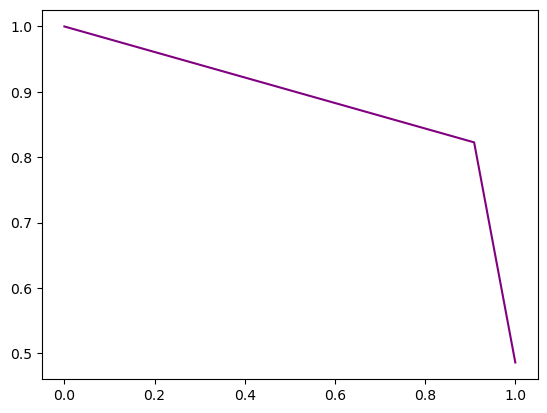

In [291]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="purple")
plt.show()

# Navie bayes

In [292]:

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [293]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [294]:
nb_p3=nb.predict(x2_te)

In [295]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3

array([[709, 380],
       [485, 748]], dtype=int64)

In [296]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

62.74763135228252

In [297]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62      1089
           1       0.66      0.61      0.63      1233

    accuracy                           0.63      2322
   macro avg       0.63      0.63      0.63      2322
weighted avg       0.63      0.63      0.63      2322



In [298]:
#tpr=tp/(tp+fn)
tpr19=703/(703+491)
tpr19

0.5887772194304858

In [299]:
#fpr=fp/(fp+tn)
fpr19=373/(373+755)
fpr19

0.33067375886524825

In [300]:
#precision=tp/(tp+fp)
precesion19=703/(703+373)
precesion19

0.6533457249070632

In [301]:
#f1score=2(precesion*recall)/(precision+recall)
f1score19=(2*(precesion19*tpr19))/(precesion19+tpr19)
f1score19

0.6193832599118944

# SVM

In [302]:
from sklearn.svm import SVC
svc=SVC()

In [303]:
svc.fit(x2_tr,y2_tr)

SVC()

In [304]:
svc_p3=svc.predict(x2_te)

In [305]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[955, 269],
       [239, 859]], dtype=int64)

In [306]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

78.1223083548665

In [307]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1224
           1       0.76      0.78      0.77      1098

    accuracy                           0.78      2322
   macro avg       0.78      0.78      0.78      2322
weighted avg       0.78      0.78      0.78      2322



In [308]:
#tpr=tp/(tp+fn)
tpr20=960/(960+234)
tpr20

0.8040201005025126

In [309]:
#fpr=fp/(fp+tn)
fpr20=261/(261+867)
fpr20

0.23138297872340424

In [310]:
#precision=tp/(tp+fp)
precesion20=960/(960+261)
precesion20

0.7862407862407862

In [311]:
#f1score=2(precesion*recall)/(precision+recall)
f1score20=(2*(precesion20*tpr20))/(precesion20+tpr20)
f1score20

0.7950310559006211

# KNN

In [312]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [313]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=15)

In [314]:
knn_p3=knn.predict(x2_te)

In [315]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[907, 235],
       [287, 893]], dtype=int64)

In [316]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

77.51937984496125

In [317]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1142
           1       0.79      0.76      0.77      1180

    accuracy                           0.78      2322
   macro avg       0.78      0.78      0.78      2322
weighted avg       0.78      0.78      0.78      2322



In [318]:
#tpr=tp/(tp+fn)
tpr21=892/(892+302)
tpr21

0.7470686767169179

In [319]:
#fpr=fp/(fp+tn)
fpr21=235/(255+553)
fpr21

0.2908415841584158

In [320]:
#precision=tp/(tp+fp)
precesion21=892/(892+235)
precesion21

0.7914818101153505

In [321]:
#f1score=2(precesion*recall)/(precision+recall)
f1score21=(2*(precesion19*tpr19))/(precesion19+tpr19)
f1score21

0.6193832599118944

# Adaboost

In [322]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [323]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [324]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [325]:
adbo_p3=adbo.predict(x2_te)

In [326]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[922, 131],
       [272, 997]], dtype=int64)

In [327]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

82.64427217915589

In [328]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1053
           1       0.88      0.79      0.83      1269

    accuracy                           0.83      2322
   macro avg       0.83      0.83      0.83      2322
weighted avg       0.83      0.83      0.83      2322



In [329]:
#tpr=tp/(tp+fn)
tpr22=907/(907+287)
tpr22

0.7596314907872697

In [330]:
#fpr=fp/(fp+tn)
fpr22=114/(114+1014)
fpr22

0.10106382978723404

In [331]:
#precision=tp/(tp+fp)
precesion22=907/(907+114)
precesion22

0.8883447600391773

In [332]:
#f1score=2(precesion*recall)/(precision+recall)
f1score22=(2*(precesion22*tpr20))/(precesion20+tpr20)
f1score22

0.8982765648098018

# xgboost

In [333]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [334]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [335]:
xgb_p3=xgb.predict(x2_te)

In [336]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[942, 158],
       [252, 970]], dtype=int64)

In [337]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

82.34280792420327

In [338]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1100
           1       0.86      0.79      0.83      1222

    accuracy                           0.82      2322
   macro avg       0.82      0.83      0.82      2322
weighted avg       0.83      0.82      0.82      2322



In [339]:
#tpr=tp/(tp+fn)
tpr23=981/(981+211)
tpr23

0.822986577181208

In [340]:
#fpr=fp/(fp+tn)
fpr23=239/(239+569)
fpr23

0.2957920792079208

In [341]:
#precision=tp/(tp+fp)
precesion23=981/(981+239)
precesion23

0.8040983606557377

In [342]:
#f1score=2(precesion*recall)/(precision+recall)
f1score23=(2*(precesion23*tpr23))/(precesion23+tpr23)
f1score23

0.8134328358208954

In [343]:
#DF-3
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc3,dt_acc3,rf_acc3,nb_acc3,svc_acc3,knn_acc3,adbo_acc3,xgb_acc3]
l3=[fpr14,fpr15,fpr16,fpr17,fpr18,fpr19,fpr20,fpr21]
l4=[tpr14,tpr15,tpr16,tpr17,tpr18,tpr19,tpr20,tpr21]
l5=[f1score14,f1score15,f1score16,f1score17,f1score18,f1score19,f1score20,f1score21]

In [344]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,78.552972,0.283416,0.838926,0.826105
1,dt,82.515073,0.284653,0.827181,0.818937
2,rf,86.046512,0.187943,0.768007,0.789496
3,nb,62.747631,0.105496,0.747069,0.809070
4,svc,78.122308,0.086879,0.817420,0.860670
5,knn,77.519380,0.330674,0.588777,0.619383
6,adaboost,82.644272,0.231383,0.804020,0.795031
7,xgboost,82.342808,0.290842,0.747069,0.619383
